# Inference and Analysis of scATAC-seq Rhythmicity using GeneRhythm
This tutorial provides a step-by-step guide on performing inference, analysis, and visualization of scATAC-seq rhythmicity in a single dataset using GeneRhythm. We demonstrate the diverse capabilities of GeneRhythm by applying it to scATAC-seq data obtained from mouse tissue samples.

GeneRhythm leverages user-provided scATAC-seq data by integrating wavelet transformation with deep generative modeling. This approach enables the extraction of frequency-domain features that complement traditional time-domain analyses, allowing for a more comprehensive understanding of gene expression dynamics. 

In [1]:
import subprocess
from Build_graph import *
from Frequency_extract import *
from GCN_VAE import *
from Show_result import *

# Part 1: Data loading, time and frequency information acquisition
## Obtain time information with monocle3
GeneRhythm firstly utilized monocle3 to obtain the trajectory information of single-cell ATAC-seq data. trajectory_inference.R is the script to run monocle3. dataset indicated the name of dataset. mtx, barcode and peak indicate the position of the single-cell ATAC-seq data.Based on the trajectory information, GeneRhythm can derive time information (Peak expression chagnes on the trajectory pesodu-time path).

In [2]:
dataset = 'mouse_atherosclerotic_plaque_immune_cells_Arsenic_ATAC'
mtx = './dataset/mouse_atherosclerotic_plaque_immune_cells_ATAC/Arsenic/matrix.mtx'
barcode = './dataset/mouse_atherosclerotic_plaque_immune_cells_ATAC/Arsenic/barcodes.csv'
peak  = './dataset/mouse_atherosclerotic_plaque_immune_cells_ATAC/Arsenic/features.csv'
subprocess.run(["Rscript", "trajectory_inference.R", dataset, mtx， barcode, peak])

##  Frequency information generation
In this step, we harness the power of wavelet transformation to extract detailed frequency information from the scATAC-seq data. By leveraging the trajectory information obtained from Monocle3—which orders cells along a pseudotime axis—we can capture both the temporal progression and the underlying periodic patterns of peak expression.

Wavelet transformation decomposes the peak expression profiles into various frequency components, enabling us to detect subtle oscillations and rhythmic behaviors that are often not apparent in the time domain alone. This multi-scale analysis helps reveal hidden periodicities.

By integrating the frequency-domain features with the temporal trajectory and expression, we achieve a more nuanced analysis. The frequency information complements the time-domain data, enhancing peak clustering. Ultimately, this combined approach provides a comprehensive view of the dynamic changes in peak expression, paving the way for deeper insights into cellular functions and regulatory processes.

In [3]:
trajectory_info = pd.read_csv("mouse_atherosclerotic_plaque_immune_cells_Arsenic_ATAC.csv")
mtx = sc.read_mtx(mtx)
mtx = mtx.X.T
barcode = pd.read_csv(barcode,sep=',',index_col=0)
gene  = pd.read_csv(peak,header=0,index_col = 0)
adata = anndata.AnnData(mtx,barcode,peak)
frequency_extract(trajectory_info, adata, dataset)

# Part 2: Model preparation and training

## Modle training
In this stage, the model is trained using time, frequency, and expression data. This integration allows the model to learn a comprehensive latent embedding that encapsulates the intricate relationships among peaks. Once the model has been trained, we apply the Leiden algorithm to the latent space to identify peak clusters. These clusters represent groups of genes with similar expression dynamics and regulatory patterns, providing a valuable basis for further biological insights and downstream analysis.

In [4]:
GeneRhythm_Model(input_data = 'mouse_atherosclerotic_plaque_immune_cells_Arsenic_ATAC.npy',sc_data = adata)


____________________________
Start Training VAE...
torch.Size([92807, 250])
Epochs: 1, AvgLoss: 33.0622
torch.Size([92807, 250])
Epochs: 2, AvgLoss: 32.9728
torch.Size([92807, 250])
Epochs: 3, AvgLoss: 32.8834
torch.Size([92807, 250])
Epochs: 4, AvgLoss: 32.7933
torch.Size([92807, 250])
Epochs: 5, AvgLoss: 32.7026
torch.Size([92807, 250])
Epochs: 6, AvgLoss: 32.6092
torch.Size([92807, 250])
Epochs: 7, AvgLoss: 32.5159
torch.Size([92807, 250])
Epochs: 8, AvgLoss: 32.4197
torch.Size([92807, 250])
Epochs: 9, AvgLoss: 32.3222
torch.Size([92807, 250])
Epochs: 10, AvgLoss: 32.2203
torch.Size([92807, 250])
Epochs: 11, AvgLoss: 32.1164
torch.Size([92807, 250])
Epochs: 12, AvgLoss: 32.0080
torch.Size([92807, 250])
Epochs: 13, AvgLoss: 31.8945
torch.Size([92807, 250])
Epochs: 14, AvgLoss: 31.7772
torch.Size([92807, 250])
Epochs: 15, AvgLoss: 31.6531
torch.Size([92807, 250])
Epochs: 16, AvgLoss: 31.5217
torch.Size([92807, 250])
Epochs: 17, AvgLoss: 31.3871
torch.Size([92807, 250])
Epochs: 18, Av

# Part 3: Showing result
In this phase, we visualize the outcomes of our analysis by displaying both the time and frequency information for each identified peak cluster. These visualizations help in interpreting the complex dynamics captured by the model and provide insights into the temporal progression and rhythmicity of peak expression within each cluster.

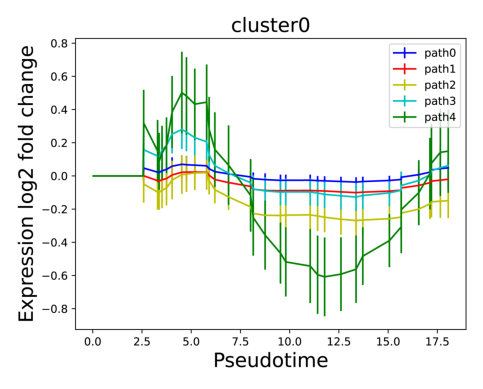

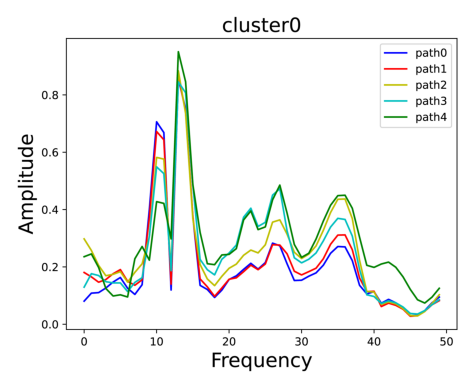

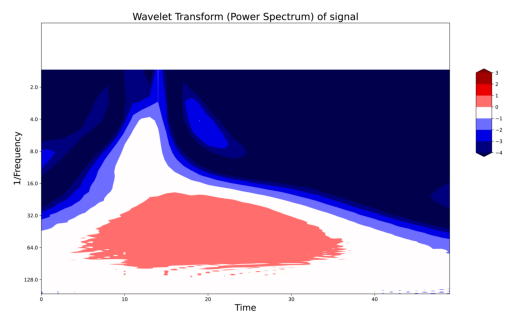

In [5]:
show_result(peak,trajectory_info)

Only the first eligible cluster's plots are ploted out. Other clusters's plots are saved to pdf files.

# Part 4: Differential frequency peaks
In this step, we perform a comparative analysis to identify peaks that show significant differences in frequency between arsenic and control. By statistically evaluating these differences, we can uncover frequency-specific regulatory elements or patterns that are condition-dependent. This analysis provides deeper biological insights into how rhythmicity may vary across different peaks, thereby highlighting potential functional elements involved in dynamic processes.

Firstly, we need to obtain the frequency information of control dataset.

In [6]:
dataset = 'mouse_atherosclerotic_plaque_immune_cells_Control_ATAC'
mtx = './dataset/mouse_atherosclerotic_plaque_immune_cells_ATAC/Control/matrix.mtx'
barcode = './dataset/mouse_atherosclerotic_plaque_immune_cells_ATAC/Control/barcodes.csv'
peak  = './dataset/mouse_atherosclerotic_plaque_immune_cells_ATAC/Control/features.csv'
subprocess.run(["Rscript", "trajectory_inference.R", dataset, mtx， barcode, peak])
trajectory_info = pd.read_csv("mouse_atherosclerotic_plaque_immune_cells_Control_ATAC.csv")

Then, run the differential frequency to obtain the differential frequency peaks.

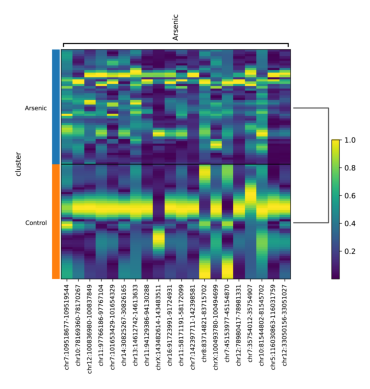

In [7]:
differential_frequency('mouse_atherosclerotic_plaque_immune_cells_Arsenic_ATAC.csv','mouse_atherosclerotic_plaque_immune_cells_Control_ATAC.csv','Arsenic','Control',peak)